## Préparation de données 

In [ ]:
import sklearn
print('La version de sklearn :', sklearn.__version__)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

La version de sklearn : 1.0.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_excel('ferres.xls')

- Afficher df

In [ ]:
df.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
0,2016-01-18,100,110,652,PLACE D'ITALIE,IMAGINE R,6515
1,2016-01-18,100,110,652,PLACE D'ITALIE,TST,1969
2,2016-01-18,100,110,656,PLAISANCE,TST,1121
3,2016-01-18,100,110,659,POISSONNIERE,IMAGINE R,2124
4,2016-01-18,100,110,66,BERCY,IMAGINE R,1468


In [ ]:
df.dtypes

JOUR               datetime64[ns]
CODE_STIF_TRNS              int64
CODE_STIF_RES              object
CODE_STIF_ARRET            object
LIBELLE_ARRET              object
CATEGORIE_TITRE            object
NB_VALD                    object
dtype: object

In [ ]:
df.isnull().sum()

JOUR               0
CODE_STIF_TRNS     0
CODE_STIF_RES      0
CODE_STIF_ARRET    0
LIBELLE_ARRET      0
CATEGORIE_TITRE    0
NB_VALD            0
dtype: int64

suppression des colonnes extra

In [ ]:
df=df.drop(['JOUR','LIBELLE_ARRET'], axis=1)
df.head()
df.describe

<bound method NDFrame.describe of        CODE_STIF_TRNS CODE_STIF_RES CODE_STIF_ARRET CATEGORIE_TITRE NB_VALD
0                 100           110             652       IMAGINE R    6515
1                 100           110             652             TST    1969
2                 100           110             656             TST    1121
3                 100           110             659       IMAGINE R    2124
4                 100           110              66       IMAGINE R    1468
...               ...           ...             ...             ...     ...
65530             100           110             494             TST    1025
65531             100           110             495             FGT     201
65532             100           110             495       IMAGINE R    1746
65533             100           110             496             FGT     377
65534             100           110             496          NAVIGO    5101

[65535 rows x 5 columns]>

**Imputation des données** : colonne NB_VALD 
& changement de type de str vers int 

In [ ]:
from random import randrange
for i in df.index:
    if df["NB_VALD"][i]=="Moins de 5":
        irand = randrange(0, 6)
        df["NB_VALD"][i]=str(irand)
        
df['NB_VALD'] = df['NB_VALD'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Visualisation ** : affichage de tous les type d'abonnement existants pour procéder à l'encodage . 

In [ ]:
df['CATEGORIE_TITRE'].value_counts()

NAVIGO         11419
IMAGINE R      11274
TST            10973
FGT            10902
AMETHYSTE      10699
AUTRE TITRE    10251
NON DEFINI        17
Name: CATEGORIE_TITRE, dtype: int64

In [ ]:
for i in df.index:
    if df["CATEGORIE_TITRE"][i]=="TST":
        df["CATEGORIE_TITRE"][i]="0"
    elif df["CATEGORIE_TITRE"][i]=="AUTRE TITRE":
      df["CATEGORIE_TITRE"][i]="1"
    elif df["CATEGORIE_TITRE"][i]=="FGT":
      df["CATEGORIE_TITRE"][i]="2"
    elif df["CATEGORIE_TITRE"][i]=="IMAGINE R":
      df["CATEGORIE_TITRE"][i]="3"
    elif df["CATEGORIE_TITRE"][i]=="AMETHYSTE":
      df["CATEGORIE_TITRE"][i]="4"
    elif df["CATEGORIE_TITRE"][i]=="NAVIGO":
      df["CATEGORIE_TITRE"][i]="5"
    else :
      df["CATEGORIE_TITRE"][i]="1"
df['CATEGORIE_TITRE'] = df['CATEGORIE_TITRE'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

**Visualisation**

In [ ]:
df.head()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,CATEGORIE_TITRE,NB_VALD
0,100,110,652,3,6515
1,100,110,652,0,1969
2,100,110,656,0,1121
3,100,110,659,3,2124
4,100,110,66,3,1468


In [ ]:
df['NB_VALD'].value_counts()

5        1489
1         822
3         792
4         784
0         742
         ... 
6348        1
34156       1
13690       1
4205        1
3886        1
Name: NB_VALD, Length: 7125, dtype: int64

In [ ]:
df.describe()

,CODE_STIF_TRNS,CATEGORIE_TITRE,NB_VALD
count,65535.000000,65535.000000,65535.000000
mean,505.305867,2.529458,1072.840162
std,346.912014,1.714691,3267.680717
min,100.000000,0.000000,0.000000
25%,100.000000,1.000000,44.000000
50%,800.000000,3.000000,193.000000
75%,800.000000,4.000000,754.000000
max,810.000000,5.000000,109095.000000


In [ ]:
for i in range (len(df)):
  #y['NB_VALD'][i]=y['NB_VALD'][i].replace(',','.')
  #if (df['NB_VALD'][i])<50:
    # df['NB_VALD'][i]=0
    # print(df['NB_VALD'][i])
  if (df['NB_VALD'][i])<1159 :
       df['NB_VALD'][i]=1
       print(df['NB_VALD'][i])
  else : 
    df['NB_VALD'][i]=2
    print(df['NB_VALD'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
2
1
2
2
1
2
1
1
1
2
2
1
1
1
2
2
1
2
1
2
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
2
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
2
2
1
2
1
2
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
2
2
1


In [ ]:
df['NB_VALD'].value_counts()

1    53040
2    12495
Name: NB_VALD, dtype: int64

ND : not defined :: suppression des lignes avec des données manquantes : choix de suppression : le nbre des lignes n'est pas tres importants 

In [ ]:
indexNames = df[ df['CODE_STIF_ARRET'] == 'ND' ].index
df.drop(indexNames , inplace=True)
indexNames = df[ df['CODE_STIF_RES'] == 'ND' ].index
df.drop(indexNames , inplace=True)

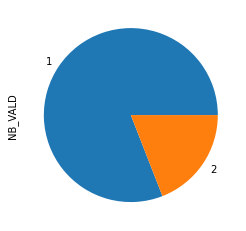

In [ ]:
df['NB_VALD'].value_counts().plot.pie()
plt.show()

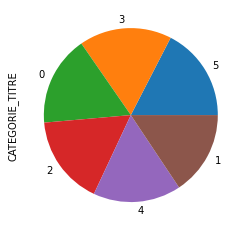

In [ ]:
df['CATEGORIE_TITRE'].value_counts().plot.pie()
plt.show()

Conversion des types 

In [ ]:
df['CODE_STIF_ARRET'] = df['CODE_STIF_ARRET'].astype(int)
df['CODE_STIF_RES'] = df['CODE_STIF_RES'].astype(int)

In [ ]:
df.dtypes

CODE_STIF_TRNS     int64
CODE_STIF_RES      int64
CODE_STIF_ARRET    int64
CATEGORIE_TITRE    int64
NB_VALD            int64
dtype: object

Séparation des données : sans labels et labels 

In [ ]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4:5]

In [ ]:
X.describe

<bound method NDFrame.describe of        CODE_STIF_TRNS  CODE_STIF_RES  CODE_STIF_ARRET  CATEGORIE_TITRE
0                 100            110              652                3
1                 100            110              652                0
2                 100            110              656                0
3                 100            110              659                3
4                 100            110               66                3
...               ...            ...              ...              ...
65530             100            110              494                0
65531             100            110              495                2
65532             100            110              495                3
65533             100            110              496                2
65534             100            110              496                5

[65427 rows x 4 columns]>

In [ ]:
y.describe()


,NB_VALD
count,65427.000000
mean,1.190762
std,0.392905
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


Séparation des données d'apprentissage et des données de test : choix de 20% 80%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

In [ ]:
X_train

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,CATEGORIE_TITRE
50408,100,110,127,0
44823,800,853,239,5
50215,800,852,62,3
20973,810,801,594,1
46222,100,110,802,5
...,...,...,...,...
19893,100,110,725,4
57779,100,110,344,0
14553,810,802,45,1
901,800,853,230,5


In [ ]:
y_train

,NB_VALD
50408,1
44823,1
50215,1
20973,1
46222,2
...,...
19893,1
57779,1
14553,1
901,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 12
Best p: 1
Best n_neighbors: 7


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Hyperparametrs avec KNN 

In [ ]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 12, 'n_neighbors': 7, 'p': 1}


In [ ]:
best_result = clf.best_score_
print(best_result)

0.9528094791275471


Application du modèle KNN

In [ ]:
knn = KNeighborsClassifier(7,p=1,leaf_size=12 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[10147   427]
 [  196  2316]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97     10574
           2       0.84      0.92      0.88      2512

    accuracy                           0.95     13086
   macro avg       0.91      0.94      0.93     13086
weighted avg       0.95      0.95      0.95     13086



**Profiling**

Une des variables pertinentes est : 
1/code stif reseau : pour les valeurs supérieures à 800 le traffic journalier ne peut etre que bas(1) . 
2/ catégorie titre qui est le type d'abonnement : pour les types 0,1,2 : on est certain qu'il s'agit d'un traffic journalier bas(1). s'il s'agit du type 5 : le traffic est élevé(2) .

**Conclusion :** s'il s'agit d'un code reseau>800 et un type de carte TST, FGT ou le reste des carte min (cad types 0,1,2) il s'agit forcement d'un traffic journalier bas.

Le reste des variables et des résultats est globalement inconcluant. 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b92369510>,
      dtype=object)

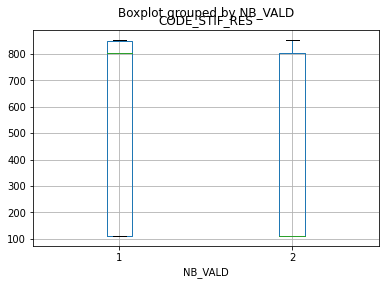

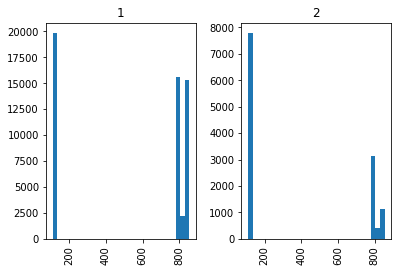

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.boxplot(column="CODE_STIF_RES",by="NB_VALD")
#Histogramme
df.hist(column="CODE_STIF_RES",by="NB_VALD",bins=30)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b92411190>,
      dtype=object)

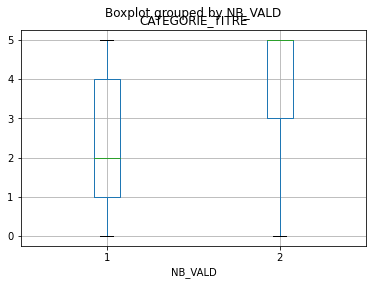

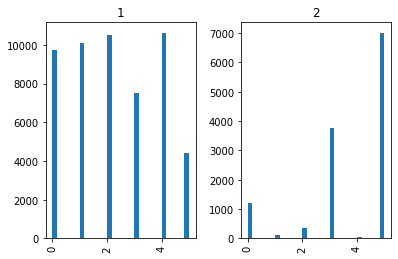

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.boxplot(column="CATEGORIE_TITRE",by="NB_VALD")
#Histogramme
df.hist(column="CATEGORIE_TITRE",by="NB_VALD",bins=30)

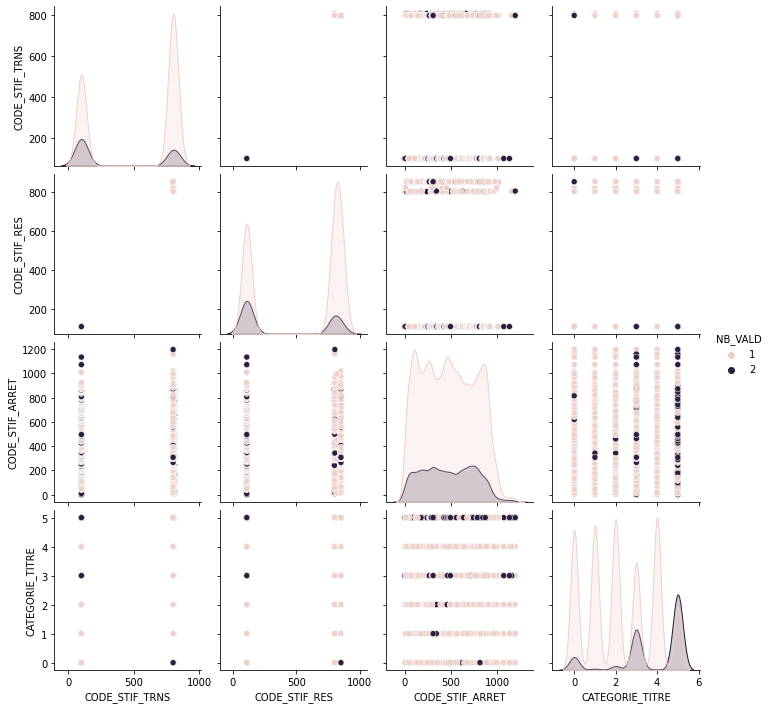

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="NB_VALD")

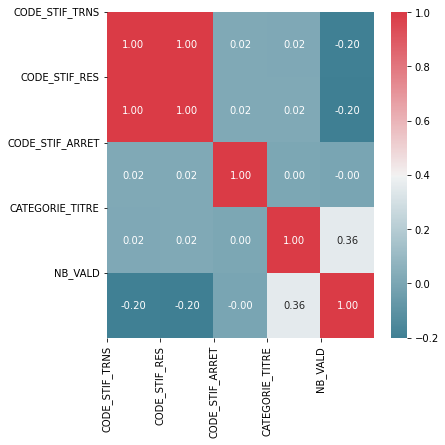

In [ ]:
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()